In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display

In [19]:
data = pd.read_csv('final_dataset.csv')
data = data[['FTR','HTP','ATP','HM1','HM2','HM3','AM1','AM2','AM3','HTGD','ATGD','DiffFormPts']]
display(data.head())

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [20]:
n_matches = data.shape[0]
n_features = data.shape[1] -1
n_homewins = (data['FTR']=='H').sum()
win_rate = (float(n_homewins) / (n_matches)) * 100
display(win_rate)

46.63533834586466

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000164B0D324E0>,
      dtype=object)

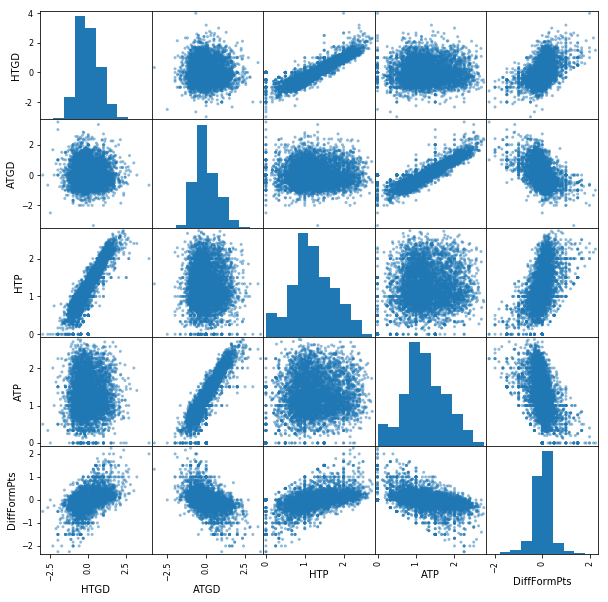

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(10,10))

In [22]:
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

from sklearn.preprocessing import scale

cols = [['HTGD','ATGD','HTP','ATP']]

for col in cols:
    X_all[col] = scale(X_all[col])

In [23]:
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

def preprocess(X):
    output = pd.DataFrame(index = X.index)
    for col, coldata in X.iteritems():
        if coldata.dtype == object:
            coldata = pd.get_dummies(coldata, prefix = col)
        output = output.join(coldata)
        
    return output

X_all = preprocess(X_all)

In [24]:
display(X_all.head())

,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,HM2_W,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
0,-2.207098,-2.257601,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.014261,-0.018236,0.0
1,-2.207098,-2.257601,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.014261,-0.018236,0.0
2,-2.207098,-2.257601,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.014261,-0.018236,0.0
3,-2.207098,-2.257601,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.014261,-0.018236,0.0
4,-2.207098,-2.257601,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.014261,-0.018236,0.0


In [33]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 70, random_state = 2, stratify = y_all)

In [34]:

from time import time
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    start = time()
    y_pred = clf.predict(features)    
    end = time()
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    print("Trained model in {:.4f} seconds".format(end - start))
    
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [35]:
clf_A = LogisticRegression(random_state = 2)
clf_B = SVC(random_state = 2, kernel='rbf')
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print()
train_predict(clf_B, X_train, y_train, X_test, y_test)
print()
train_predict(clf_C, X_train, y_train, X_test, y_test)

Training a LogisticRegression using a training set size of 5250. . .
Trained model in 0.0369 seconds
Made predictions in 0.0020 seconds.
0.6051835853131748 0.6518095238095238
F1 score and accuracy score for training set: 0.6052 , 0.6518.
Made predictions in 0.0000 seconds.
F1 score and accuracy score for test set: 0.6462 , 0.6714.

Training a SVC using a training set size of 5250. . .
Trained model in 2.9244 seconds
Made predictions in 1.7920 seconds.
0.5839622641509433 0.664
F1 score and accuracy score for training set: 0.5840 , 0.6640.
Made predictions in 0.0249 seconds.
F1 score and accuracy score for test set: 0.6207 , 0.6857.

Training a XGBClassifier using a training set size of 5250. . .
Trained model in 1.3342 seconds
Made predictions in 0.0388 seconds.
0.6342665173572228 0.688952380952381
F1 score and accuracy score for training set: 0.6343 , 0.6890.
Made predictions in 0.0030 seconds.
F1 score and accuracy score for test set: 0.6129 , 0.6571.


C:\Users\jimit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\jimit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

clf = xgb.XGBClassifier(seed=2)

f1_scorer = make_scorer(f1_score,pos_label='H')

grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

grid_obj = grid_obj.fit(X_train,y_train)

clf = grid_obj.best_estimator_
print(clf)
f1, acc = predict_labels(clf, X_train, y_train)
print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

C:\Users\jimit\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\jimit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\jimit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\jimit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Retur

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=40, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=2,
       silent=None, subsample=0.8, verbosity=1)
Made predictions in 0.0260 seconds.
F1 score and accuracy score for training set: 0.6024 , 0.6693.
Made predictions in 0.0030 seconds.
F1 score and accuracy score for test set: 0.6452 , 0.6857.


C:\Users\jimit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\jimit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
